------
### Titanic Dataset : Learning from Disaster
------
### Author : Jack Stelling
------

The following code contains the detailed exploratory data analysis and modelling strategy applied to the *Titanic Dataset*. Section numbers and headings are contained for ease of navigation and are referred to in the sister report summarising the findings and explaining tested models.

For any issues or comments please e-mail j.stelling2.ncl.ac.uk 

___

### Report Structure:

- Background and Data Dictionary
- Initial Data Probe and Summary Visualisations

1. **Data Quality Checks**
    - 1.1 Completeness
    - 1.2 Correctness
    - 1.3 Plausibility 
    - 1.4 Concordence 
    - 1.5 Currency   
___
2. **Imputation of Missing Values**
    - 2.1 Age Imputation
    - 2.2 Cabin Imputation
    - 2.3 Embarked and Fare Imputation  
___
3. **Exploratory Data Analysis**
    - 3.1 Survival Rates
    - 3.2 Multicollinearity
    - 3.3 Other  
___
4. **Analysis (Model Fitting/Development)**
    - 4.1 Setting up the data matrix
        - Label Encoding 
        - Feature Scaling
        - Resampling Methods
<br>
<br>
    - 4.2 Modelling ( In next Notebook: [Titanic2](Titanic2.ipynb) )
         - Logistic Regression
         - K-NearestNeighbours
         - Decsion Tree and Random Forest
         - Ensemble with Gradient Booster
         - Support Vecotr Machines
         - Naive Bayes
         - Perceptron
___

#### Background and Data Dictionary

The RMS Titanic sank in the North Atlantic in the early hours of 15th April 1912 during her maiden voyage from Southampton to New York. The tragedy killed 1502 out of the 2224 passengers on board, making it the deadliest sinking of a cruise ship to date. Inquest into the evacuation efforts revealed unfair treatment of the different class passengers and a ‘woman and children’ first rule whilst filling the lifeboats – which were deemed to be launched under capacity amidst the chaos. A comprehensive exploratory data analysis is conducted to see if the data is in agreement with conjecture whence machine learning algorithms are implemented to assess the predictability of the survivors given a passenger’s profile. 
___

**Data Dictionary:** 

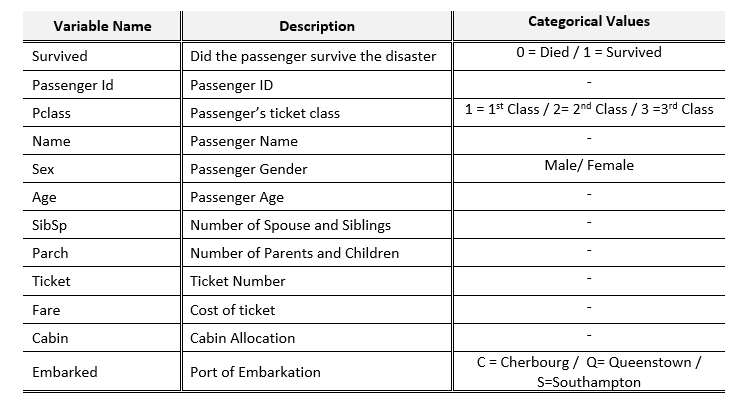


In [1]:
# import libraries:

import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
# import the datasets 

train = pd.read_csv(r'C:\Users\Lenovo\Documents\DATA_SCIENCE\CSC8635\TitanicProject\train.csv')
test = pd.read_csv(r'C:\Users\Lenovo\Documents\DATA_SCIENCE\CSC8635\TitanicProject\testdata_with_groundTruth.csv')

data = [train, test]
# bury the test set under the bed for now. 

## Initial Data Probe

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
print('Training Set Dimensions', train.shape)
print('---------------------------------')
print('Testing Set Dimensions ', test.shape)

Training Set Dimensions (891, 12)
---------------------------------
Testing Set Dimensions  (418, 12)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


## Summary Visuals:
___

Text(0.5, 0.98, 'A summary of the titanic training dataset')

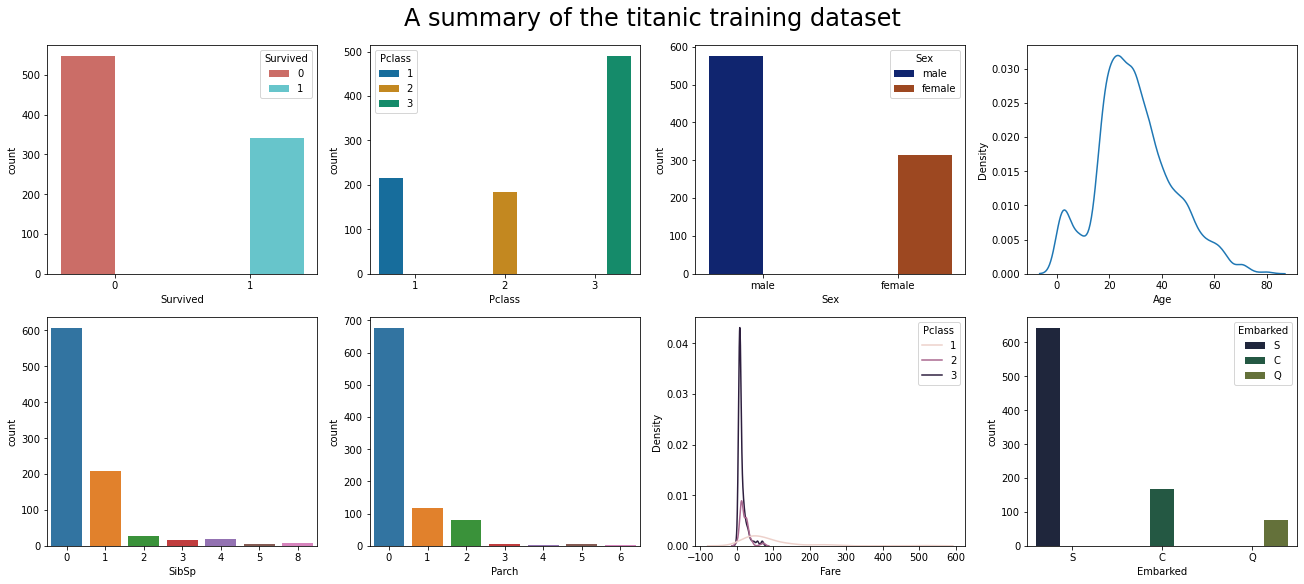

In [7]:
# Remove nonsense columns for plotting i.e. name, passenger number, etc. 
columns_to_drop = ['PassengerId', 'Name' , 'Ticket' , 'Cabin' ]
trainviz = train.drop(columns_to_drop, axis = 1)



fig, axs = plt.subplots(2, 4, figsize=(18, 8), constrained_layout=True)

#specify colour palettes:
palette1 = sns.color_palette("rocket")
palette2 = sns.color_palette("cubehelix")
palette3 = sns.color_palette("rocket")
palette4 = sns.color_palette("rocket")


sns.countplot( x = 'Survived' , hue='Survived' , data = trainviz, palette='hls' ,
               ax = axs[0,0] )
sns.countplot( x="Pclass", data=trainviz, hue = 'Pclass' ,palette='colorblind',
               ax = axs[0,1] )
sns.countplot( x= "Sex",  data=trainviz , hue = 'Sex' ,  palette = 'dark', 
               ax = axs[0,2] )
sns.kdeplot( x= "Age", data=trainviz , bw_adjust=.6 ,
             ax = axs[0,3] )
sns.countplot( x = 'SibSp' , data = trainviz, 
               ax = axs[1,0] )
sns.countplot( x= "Parch", data=trainviz, 
               ax = axs[1,1] )
sns.kdeplot( x= "Fare", data=trainviz , hue='Pclass',
             ax = axs[1,2] )
sns.countplot( x= "Embarked", data=trainviz , hue = 'Embarked' ,palette = palette2 ,
               ax = axs[1,3] )
fig.suptitle('A summary of the titanic training dataset', fontsize=24)


### Split over two facets and control axis and legend aesthetics for report.

[None, None]

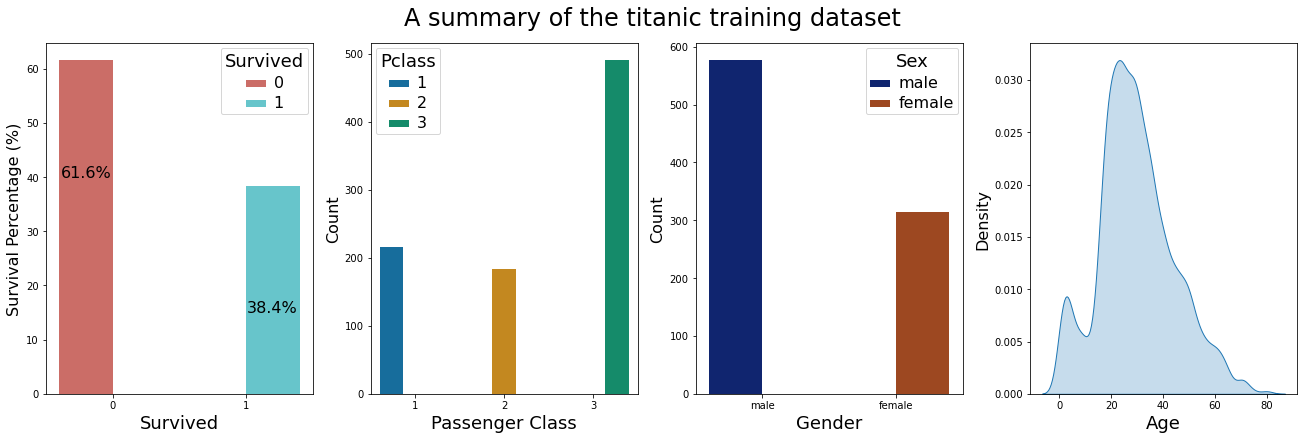

In [8]:
fig, axs = plt.subplots(1, 4, figsize=(18, 6), constrained_layout=True)

#specify colour palettes:
palette1 = sns.color_palette("rocket")
palette2 = sns.color_palette("cubehelix")
palette3 = sns.color_palette("Set2")
palette4 = sns.color_palette("Set3")


train0 = train['Survived'].value_counts(normalize=True)
train0 = train0.mul(100)   # Multiply normalized values by 100 to get percentages
train0 = train0.rename('Percent').reset_index()    # Sets it back to pd dataframe

g = sns.barplot( x = 'index', y = 'Percent' , 
                 hue= 'index',  
                data=train0, palette = 'hls' , ax=axs[0])

g.text(-0.2, 40, '61.6%',size=16, color='black',horizontalalignment='center' )
g.text(1, 15, "38.4%", size=16, color='black' )

#sns.countplot( x = 'Survived' , hue='Survived' , data = trainviz, palette='hls' ,
#               ax = axs[0] )
sns.countplot( x="Pclass", data=trainviz, hue = 'Pclass' ,palette='colorblind',
               ax = axs[1] )
sns.countplot( x= "Sex",  data=trainviz , hue = 'Sex' ,  palette = 'dark', 
               ax = axs[2] )
sns.kdeplot( x= "Age", data=trainviz , bw_adjust=.6 , fill=True,
             ax = axs[3] )
fig.suptitle('A summary of the titanic training dataset', fontsize=24)


# Manually set aesthetics for report:

axs[0].set_xlabel('Survived', fontsize=18)
axs[0].set_ylabel('Survival Percentage (%)', fontsize=16)
axs[1].set_xlabel('Passenger Class', fontsize=18)
axs[1].set_ylabel('Count', fontsize=16)
axs[2].set_xlabel('Gender', fontsize=18)
axs[2].set_ylabel('Count', fontsize=16)
axs[3].set_xlabel('Age', fontsize=18)
axs[3].set_ylabel('Density', fontsize=16)

# Legend sizes for readability: 

# The following is useful if we want to alter all legends together:
#for ax in axs:    
#    plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
#    plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

# To alter each individually:

g.legend(title='Survived', loc='upper right')
plt.setp(axs[0].get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(axs[0].get_legend().get_title(), fontsize='18') # for legend title

plt.setp(axs[1].get_legend().get_texts(), fontsize='16')
plt.setp(axs[1].get_legend().get_title(), fontsize='18')

plt.setp(axs[2].get_legend().get_texts(), fontsize='16')
plt.setp(axs[2].get_legend().get_title(), fontsize='18')

[None, None]

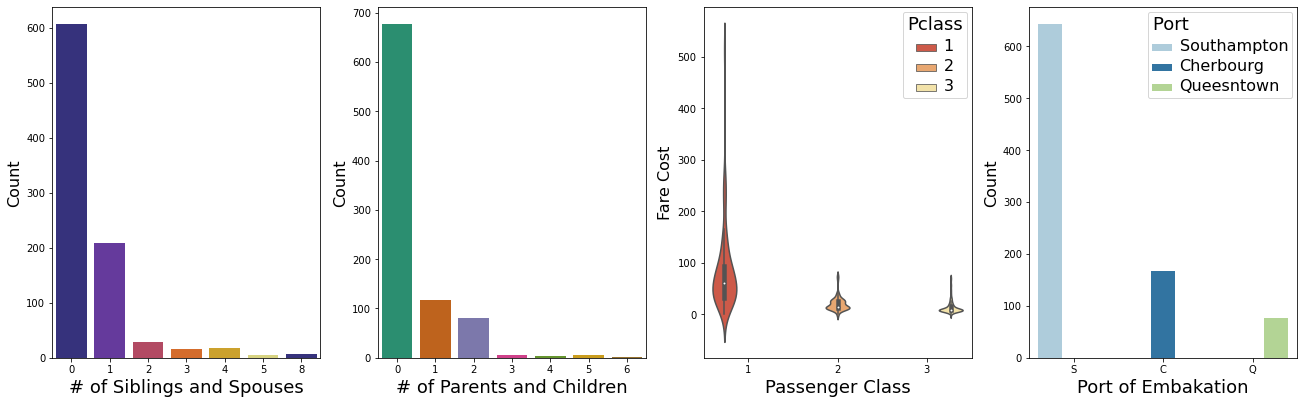

In [9]:
fig, axs = plt.subplots(1, 4, figsize=(18, 5.5), constrained_layout=True)



sns.countplot( x = 'SibSp' , data = trainviz, palette = sns.color_palette("CMRmap"),
               ax = axs[0] )
sns.countplot( x= "Parch", data=trainviz, palette = sns.color_palette("Dark2"),
               ax = axs[1] )
g = sns.violinplot( x='Pclass', y= "Fare", data=trainviz , hue='Pclass', palette = sns.color_palette("RdYlBu"),
             ax = axs[2] )
f = sns.countplot( x= "Embarked", data=trainviz , hue = 'Embarked' ,palette = sns.color_palette("Paired"),
               ax = axs[3] )

# Aesthetic control:

axs[0].set_xlabel('# of Siblings and Spouses', fontsize=18)
axs[0].set_ylabel('Count', fontsize=16)
axs[1].set_xlabel('# of Parents and Children', fontsize=18)
axs[1].set_ylabel('Count', fontsize=16)
axs[2].set_xlabel('Passenger Class', fontsize=18)
axs[2].set_ylabel('Fare Cost', fontsize=16)
axs[3].set_xlabel('Port of Embakation', fontsize=18)
axs[3].set_ylabel('Count', fontsize=16)

# Legends readability:
#g.legend(title='Class', loc='upper right', labels=['1st', '2nd', '3rd'])
plt.setp(axs[2].get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(axs[2].get_legend().get_title(), fontsize='18') # for legend title


f.legend(title='Port                 ', loc='upper right', labels=['Southampton', 'Cherbourg', 'Queesntown'])
plt.setp(axs[3].get_legend().get_texts(), fontsize='16')
plt.setp(axs[3].get_legend().get_title(), fontsize='18')

## 1. Data Quality Checks 
---
 Data Quality is assessed via the following 5 dimensions: 
- Completeness
- Correctness
- Plausibilty
- Concordance 
- Currency
---

### 1.1    Completeness:
____

In [10]:
display(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
display(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
total_train = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total_train, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


In [13]:
total_test = test.isnull().sum().sort_values(ascending=False)
percent_1 = test.isnull().sum()/test.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total_test, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
Embarked,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


### 1.2 Correctness:
____

In [14]:
# Summary stats are used to determine whether values have been input correctly. Eg. Negative Age's

print('Train Summaries\n \n',train.describe())
print('______________________________________')

print('')

print('Test Summaries\n \n',test.describe())
print('______________________________________')

Train Summaries
 
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
______________________________________

Test Summaries
 
     

In [15]:
## Are ordinal factor variables for Survived, Pclass, Embarked, Sex all correct?

print(train.Sex.unique())
print('---')
print(test.Sex.unique())
print('---')
print(train.Embarked.unique())
print('---')
print(test.Embarked.unique())
print('---')
print(train.Pclass.unique())
print('---')
print(test.Pclass.unique())
print('---')
print(train.Survived.unique())
print('---')
print(test.Survived.unique())

['male' 'female']
---
['male' 'female']
---
['S' 'C' 'Q' nan]
---
['Q' 'S' 'C']
---
[3 1 2]
---
[3 2 1]
---
[0 1]
---
[0 1]


All ordinal factors have the correct unique values for both the training and test datasets. The only issue being the missing values for the emabarked variable in the training dataset. 

### 1.3 Plausibility
____

The plausibility criterion can be satisfied by investigating maximum and minimum values as above, where boxplots visually displaying the range of values and outliers are a particularly useful tool (see summary graphs). For instance, an Age of 120 might be possible but highly unlikely. Both plausibility and correctness criteria were satisfied.

### 1.4 Concordance
___

Concordance refers to the agreement between variables -for example, if a passenger has a male title (‘Mr’, ‘Master’) one would expect a ‘Male’ entry in the gender variable. Other examples of concordance are where we would expect different class denominations to have a similar distribution of ticket costs, and numbers of parents and children to be consistent across the different ticket numbers.

In [16]:
# Check if ticket have similar distribution
train.groupby('Pclass')['Fare'].describe()
# yes except for larger outliers in 1st class. 

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


In [17]:
# The maximum in the groups are high, investigate:
train.loc[train['Fare']==69.55]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


The maximum are all >> mean since some tickets were issued for a whole family as we see above. We also see evidence of concordance with the values for Parch and SibSp.

### 1.5 Currency
___

Currency of data was accepted due to the historical context of the problem. 

___
## 2. Imputation
___
For each predictor variable which had a missing value *(Age, Cabin, Embarked, Fare)* methods to fill these values with a sensible substitue are explored below.  
___

### 2.1 Age Imputation (Stratified Sampling)
___

As a proxy for Age we can gain the Title information from the *Name* variable. In the era that the records were taken, 'Master' was a male child's title and an adult would have been known as 'Mr'. Anagously for woman an unmarried (normally younger) would be known as a 'Miss' where a married womans title would be 'Mrs'. This is known as **feature engineering**.

In [18]:
# Feature Engineering for title

train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
train.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [19]:
# Extracting titles to use as an age proxy:
data = [train, test]
titles = {"Mr": 1, "Master": 2, "Mrs": 3, "Miss": 4, "Other": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
for dataset in data:

    dataset.loc[(dataset['Title'] == 'Other') & (dataset['Sex'] == 'male'), 'Title'] = 'Mr'
    dataset.loc[(dataset['Title'] == 'Other') & (dataset['Sex'] == 'female'), 'Title'] = 'Mrs'

In [20]:
def sampler(Pclass, Title):

    #np.random.seed(118)
    m = mean[Pclass, Title][0]
    s = std[Pclass, Title][0]
    #rand_age = np.random.randint(m - s, m + s, size = 1)  samples uniformly - we can do better
    rand_age = np.random.normal(m, s, 1).astype('int')
    
    if rand_age[0] <= 0 : rand_age[0] = 1
    elif rand_age[0] >= 80 : rand_age[0] = 70 
    elif rand_age[0] == np.nan : rand_age[0] = dataset['Age'].median() # to deal with the even that pclass = x and title = y doesnt occur
    
    return rand_age[0]


data = [train, test]

for dataset in data:
    
    mean = dataset.groupby(['Pclass', 'Title'])['Age'].mean()
    mean = pd.DataFrame([mean])
    std = dataset.groupby(['Pclass', 'Title'])['Age'].std()
    std = pd.DataFrame([std])

    Pclass_val = sorted(dataset['Pclass'].unique())
    Title_val = sorted(dataset['Title'].unique())
    
    for p, t in [(p,t) for p in Pclass_val for t in Title_val]:
    
        for i in dataset.loc[(dataset['Pclass']==p) & (dataset['Title']==t) & (dataset['Age'].isna()) ].index:
            dataset.at[i,'Age'] = sampler(p,t)
    

### 2.2 Cabin Imputation
___

In [21]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [22]:
# If might be useful to merge the test and training sets to impute values later

total_test = test.isnull().sum().sort_values(ascending=False)
percent_1 = test.isnull().sum()/test.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total_test, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Cabin,327,78.2
Fare,1,0.2
Title,0,0.0
Embarked,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Age,0,0.0
Sex,0,0.0
Name,0,0.0


We select the deck variable and impute the missing values further down the notebook. In depth research into the ships floor plan on each deck were conducted. A full explanation into these attempts is outlined in the code document. An effort to relay this research into a categorical variable partitioning the cabin allocations into Fore and Aft areas with Port and Starboard creating bins into one of four regions on the ship were attempted; however, with so much information missing, it was difficult to infer a meaningful result and any attempt to impute values would be too farfetched. Thus, missing cabin allocations were expressed as a dummy variable ‘Z’ representing an unknown deck and the initial letter from the completed cabins was parsed and stored in a new variable ‘Deck’. See **Setting up the data matrix** below:

### 2.2 Fare and Embakation Imputation
___

### Port of Embarkation  

Firstly we locate where the where occurances of missing port of embarkation are in the dataset: 

In [23]:
train.loc[train['Embarked'].isnull()] # the test set is complete, thus only search training set. 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


Since we only have two values to deal with in this instance it is feasible to research the passengers and see if we can find the acutal ground truth.

**Ground truth :** Miss Rose Amelie Icard was a maid to Mrs George Nelson Stone. They both survived and they both embarked at Southampton. So we can simply add the ground truth to the database. 
Reference: https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html

In [24]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
train.loc[train['Embarked'].isnull(), 'Embarked'] = 'S'

In [26]:
train['Embarked'].value_counts() #We verify the counter has increased by 2 for 'S'. 

S    646
C    168
Q     77
Name: Embarked, dtype: int64

### Fare  

Next we investigate the missing fare values, we have one occurance in the test set:

In [27]:
test.loc[test['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr


In [28]:
test.groupby(['Pclass', 'Embarked'])['Fare'].median() 

Pclass  Embarked
1       C           75.24585
        Q           90.00000
        S           51.67085
2       C           15.04580
        Q           11.52915
        S           21.00000
3       C            7.22920
        Q            7.75000
        S            8.05000
Name: Fare, dtype: float64

We can impute the missing value by the mean of the fare value from Mr Thomas Storey's departure port in Southampton. Thus a value of £8.05 is added. 

In [29]:
test.loc[test['Fare'].isnull(), 'Fare'] = 8.05
test.loc[test['Fare'].isnull()] # Expect to be empty

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [30]:
test.loc[(test['Fare']>=60) & (test['Pclass'] == 3)] # same ticket so fare is ticket price for whole family, thats why the median value was selcted

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
188,1080,0,3,"Sage, Miss. Ada",female,20.0,8,2,CA. 2343,69.55,NaN,S,Miss
342,1234,0,3,"Sage, Mr. John George",male,31.0,1,9,CA. 2343,69.55,NaN,S,Mr
360,1252,0,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S,Master
365,1257,0,3,"Sage, Mrs. John (Annie Bullen)",female,31.0,1,9,CA. 2343,69.55,NaN,S,Mrs


---
## 3. Eploratory Data Analysis
---

### Pairs Plot for multicollinearity 

Text(0.5, 1.04, 'Pairs Plot of Explanatory variables in Titanic Dataset')

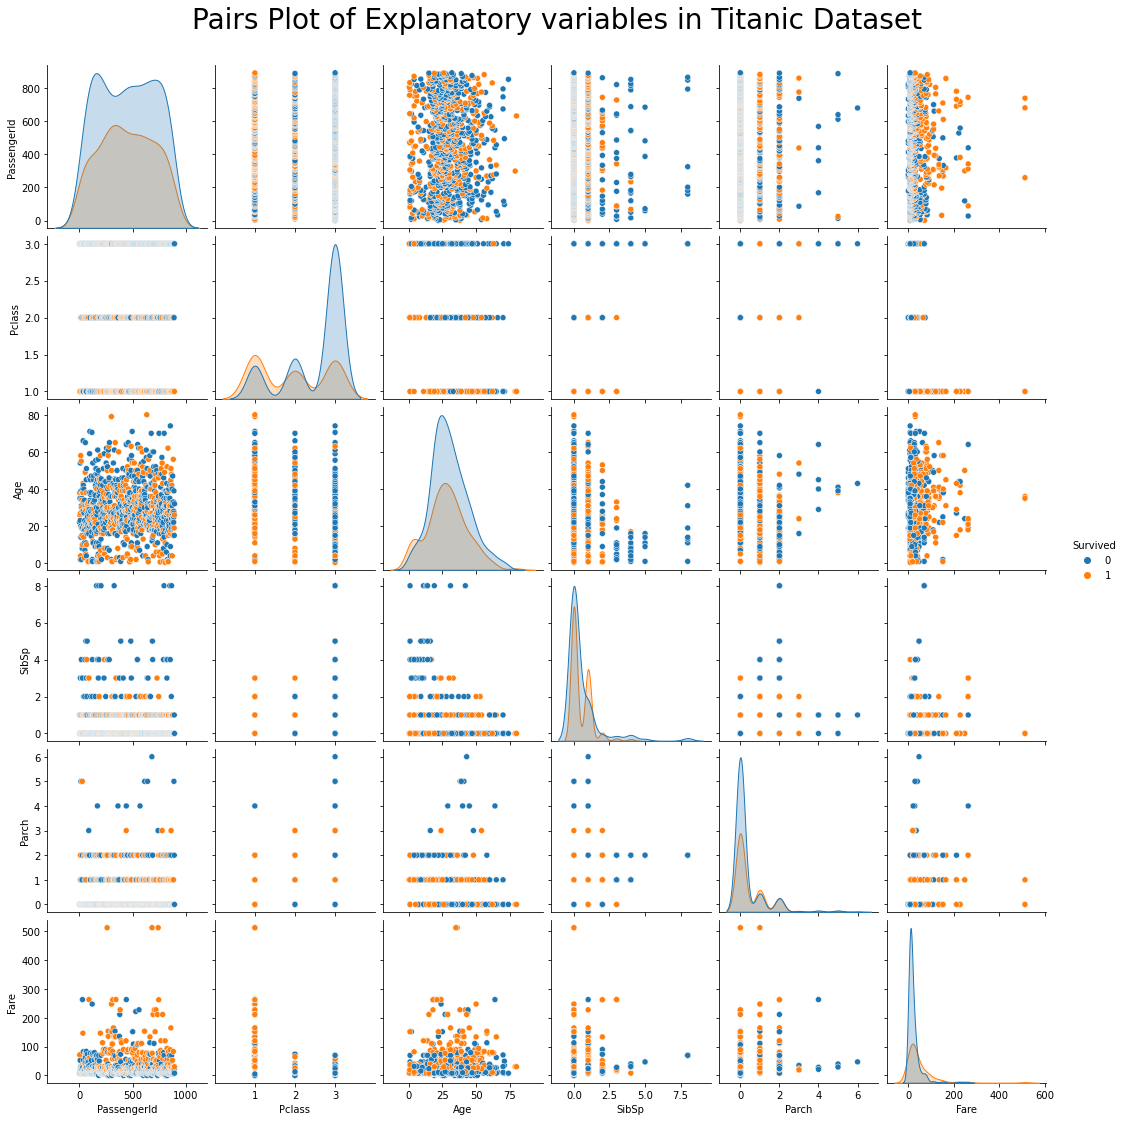

In [31]:
# Pairs plot to investigate multicolliniarity 
sns.pairplot(train, hue = 'Survived')
# Title 
plt.suptitle('Pairs Plot of Explanatory variables in Titanic Dataset', 
             size = 28, y = 1.04)

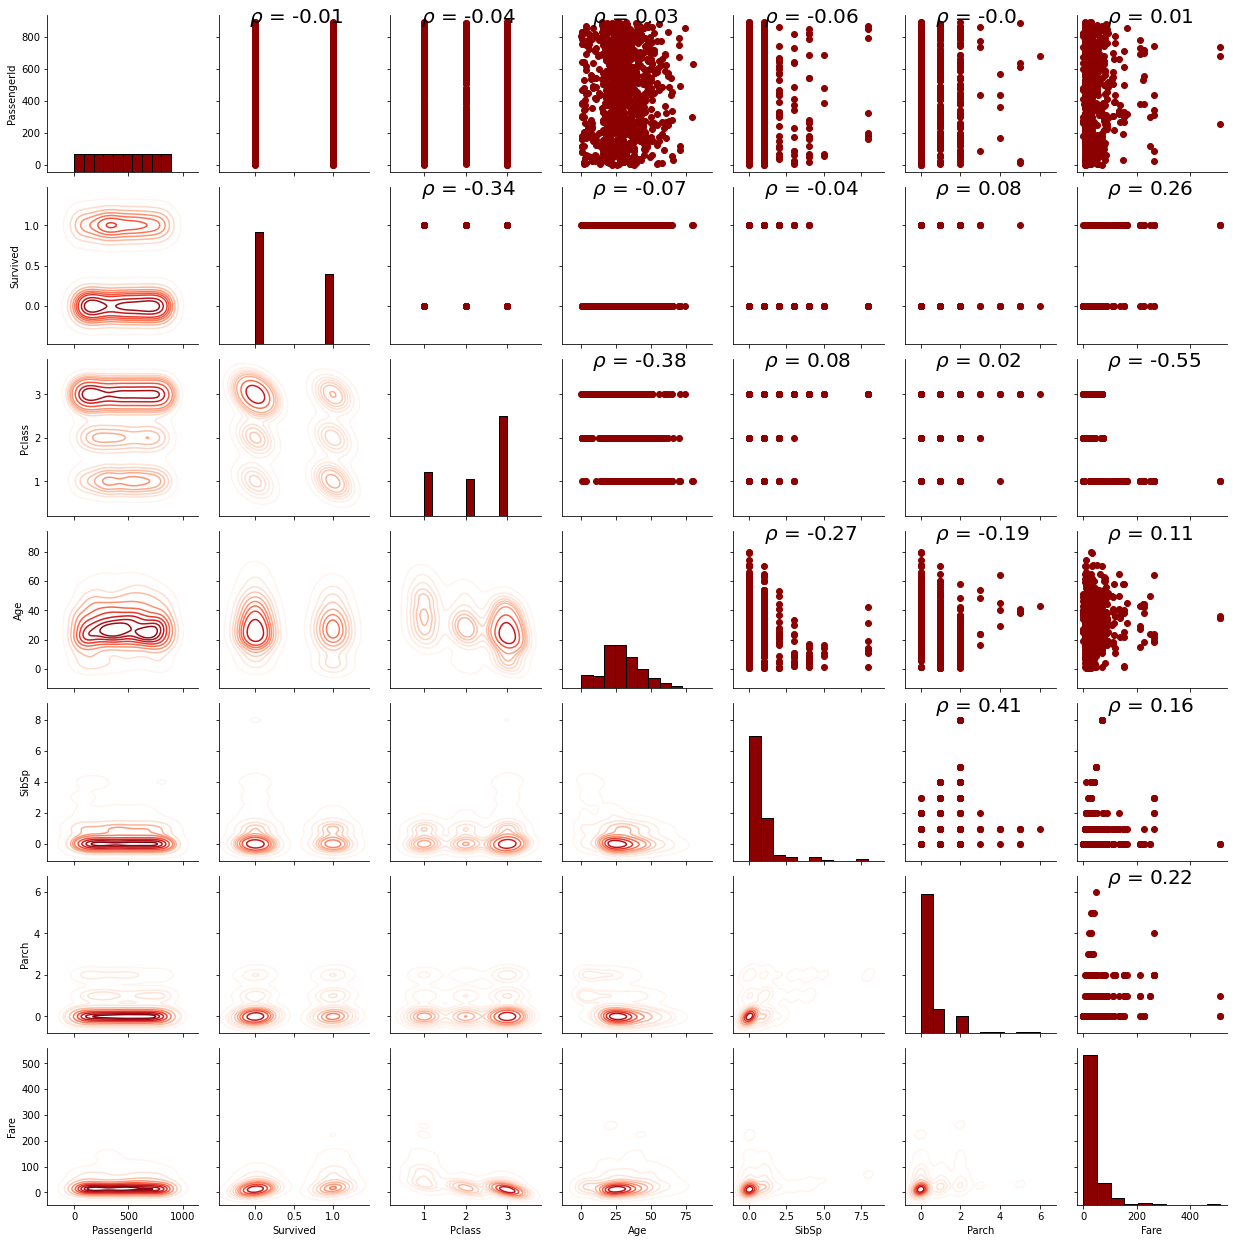

In [32]:
# Function to calculate correlation coefficient between two arrays

def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)
    
# Create a pair grid instance
grid = sns.PairGrid(data = train)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkred');

Text(0.5, 1.0, 'Overall Survival Rate')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


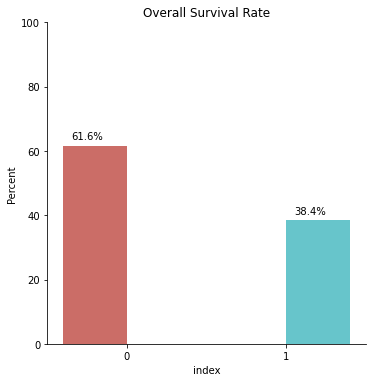

In [33]:
train0 = train['Survived'].value_counts(normalize=True)
train0 = train0.mul(100)   # Multiply normalized values by 100 to get percentages
train0 = train0.rename('Percent').reset_index()    # Sets it back to pd dataframe

g = sns.catplot( x = 'index', y = 'Percent' , 
                 hue= 'index', kind='bar', 
                 data=train0, palette = 'hls')
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x +0.05, txt_y+2 , txt)
g.ax.set_title('Overall Survival Rate')

Text(0.5, 1.0, 'Survival Rates For each Class')

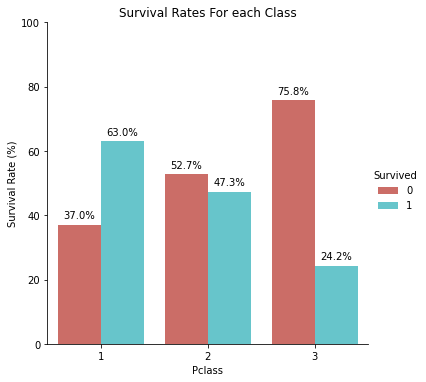

In [34]:
## Plot survival rates for each class

train1 = train.groupby('Pclass')['Survived'].value_counts(normalize=True)
train1 = train1.mul(100)   # Multiply normalized values by 100 to get percentages
train1 = train1.rename('Survival Rate (%)').reset_index()    # Sets it back to pd dataframe

g = sns.catplot( x = 'Pclass', y = 'Survival Rate (%)' , 
                 hue= 'Survived', kind='bar', 
                 data=train1, palette = 'hls')
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x +0.05, txt_y+2 , txt)
g.ax.set_title('Survival Rates For each Class')

Text(0.5, 1.0, 'Survival Rates for Gender')

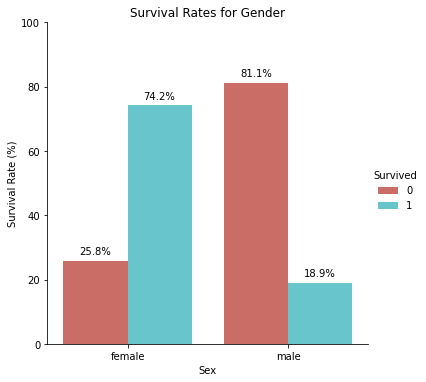

In [35]:
## Plot survival rates for each sex

train2 = train.groupby('Sex')['Survived'].value_counts(normalize=True)
train2 = train2.mul(100)   # Multiply normalized values by 100 to get percentages
train2 = train2.rename('Survival Rate (%)').reset_index()    # Sets it back to pd dataframe

g = sns.catplot( x = 'Sex', y = 'Survival Rate (%)' , 
                 hue= 'Survived', kind='bar', 
                 data=train2, palette = 'hls')
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x +0.1, txt_y+2 , txt)
g.ax.set_title('Survival Rates for Gender')

Text(0.5, 1.0, 'Survival Rates for Age Categories')

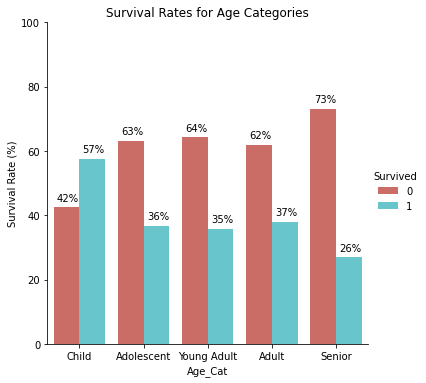

In [36]:
train.loc[ train['Age'] <= 10, 'Age_Cat'] = 'Child' # Child
train.loc[(train['Age'] > 10) & (train['Age'] <= 16), 'Age_Cat'] = 'Adolescent' # Adolescent
train.loc[(train['Age'] > 16) & (train['Age'] <= 30), 'Age_Cat'] = 'Young Adult' # Young Adult
train.loc[(train['Age'] > 30) & (train['Age'] <= 60), 'Age_Cat'] = 'Adult' # Adult
train.loc[ train['Age'] > 60 , 'Age_Cat'] = 'Senior' # Senior 


train3 = train.groupby('Age_Cat')['Survived'].value_counts(normalize=True)
train3 = train3.mul(100)   # Multiply normalized values by 100 to get percentages
train3 = train3.rename('Survival Rate (%)').reset_index()    # Sets it back to pd dataframe

g = sns.catplot( x = 'Age_Cat', y = 'Survival Rate (%)' , 
                 hue= 'Survived', kind='bar', 
                 data=train3, palette = 'hls',
                order=['Child', 'Adolescent', 'Young Adult', 'Adult', 'Senior'])
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().astype('int')) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x +0.05, txt_y+2 , txt)
g.ax.set_title('Survival Rates for Age Categories')

<AxesSubplot:xlabel='Age_Cat,Pclass'>

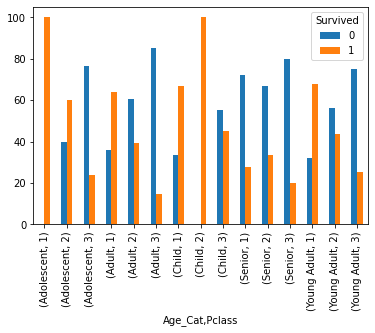

In [37]:
train4 = train.groupby(['Age_Cat', 'Pclass'])['Survived'].value_counts(normalize=True) 
train4 = train4.mul(100)   # Multiply normalized values by 100 to get percentages
train4 = train4.rename('Percent').unstack()    # Sets it back to pd dataframe
train4.plot.bar()

Text(0.5, 1.0, 'Survival Rates for gender and age category ')

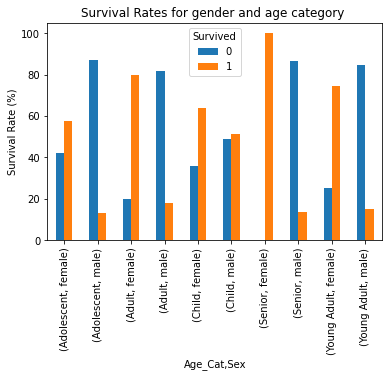

In [38]:
train5 = train.groupby(['Age_Cat', 'Sex'])['Survived'].value_counts(normalize=True)
train5 = train5.mul(100)   # Multiply normalized values by 100 to get percentages
train5 = train5.rename('Survival Rate (%)').unstack()

train5.plot.bar()
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rates for gender and age category ')

Incredibly this shows over all age groups females were hugely more likely to survive than males in the same group. Except for children who were considered equally.

<AxesSubplot:xlabel='Age_Cat,Pclass'>

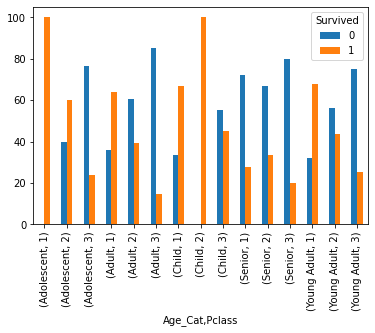

In [39]:
train6 = train.groupby(['Age_Cat', 'Pclass'])['Survived'].value_counts(normalize=True)
train6 = train6.mul(100)   # Multiply normalized values by 100 to get percentages
train6 = train6.rename('Survival Rate (%)').unstack()
train6.plot.bar()

Obvious evidence that the class were treated unfairly.

---
## 4. Analysis (Model Fitting):
---

### 4.1  Setting up the data matrix:

#### Encoding Age

In [40]:
for dataset in data:
    
    dataset['Age_Cat'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 10, 'Age_Cat'] = 'Child'
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 16), 'Age_Cat'] =  'Adolescent'
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 30), 'Age_Cat'] =  'Young Adult'
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 60), 'Age_Cat'] =  'Adult'
    dataset.loc[ dataset['Age'] > 60 , 'Age_Cat'] = 'Senior' 
    

#train_AgeLevel = train
#test_AgeLevel = test
    
Age_Level = { 'Child' : 1, 'Adolescent' : 2, 'Young Adult' : 3, 'Adult' : 4, 'Senior' :5 }
#agedataset = [train_AgeLevel, test_AgeLevel]

for dataset in data: # change back to agedataset if doesnt work
    dataset['Age_Level']= dataset['Age_Cat'].map(Age_Level).astype('int')


#### Encoding Port

In [41]:
port = {'S' : 1, 'C' : 2, 'Q' : 3}

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(port).astype('int')

#### Creating Deck from cabin

In [42]:
for dataset in data :

    dataset['Deck'] = dataset['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'Z')
    
    train.loc[train['Deck']=='T', 'Deck'] = 'A'
    
    deck = { 'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' :5, 'F' : 6, 'G': 7, 'Z' : 8  }
    dataset['Deck']= dataset['Deck'].map(deck).astype('int')


#### Siblings Spouse, Parent Child. 

In [43]:
for dataset in data :

    dataset['Relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['Relatives'] == 0, 'GroupSize'] = 'Alone'
    dataset.loc[(dataset['Relatives'] >=1) & (dataset['Relatives'] <=3), 'GroupSize'] = 'Small'
    dataset.loc[dataset['Relatives'] > 3 , 'GroupSize'] = 'Large'
    dataset.drop('Relatives', axis=1)
    
    groupsize = { 'Alone' : 1, 'Small' : 2, 'Large' : 3 }
    dataset['GroupSize']= dataset['GroupSize'].map(groupsize)

#### Encoding Title and Gender

In [44]:
for dataset in data :
    
    dataset['Title'] = dataset['Title'].map(titles)
    
    # Encode gender
    gender = { 'male' : 0, 'female' : 1}
    dataset['Sex'] = dataset['Sex'].map(gender)

#### Upper and Lower Decks

In [45]:
## What about simplifing to simply upper and lower. We assume 3rd class is lower?

#for dataset in data :
#    dataset['UpperLower'] = dataset['Deck'].apply(lambda x: 'Lower' if x<=4 else 'Upper')
    
#train_UpLow = train
#test_UpLow = test

#### One-Hot Encoding (Age_Cat)

In [46]:
# TRAIN set
# Get one hot encoding of columns Age_Cat
one_hot = pd.get_dummies(train['Age_Cat'])
# Drop column Age_Cat as it is now encoded
train_one_hot = train.drop('Age_Cat',axis = 1)
# Join the encoded df
train_one_hot = train.join(one_hot)

# TEST set
# Get one hot encoding of columns Age_Cat
one_hot = pd.get_dummies(test['Age_Cat'])
# Drop column Age_Cat as it is now encoded
test_one_hot = test.drop('Age_Cat',axis = 1)
# Join the encoded df
test_one_hot = test.join(one_hot)


#### Feature Scaling

In [47]:
# Normalised Fare:
train_one_hot['Fare'] = (train_one_hot['Fare']-train_one_hot['Fare'].mean())/train_one_hot['Fare'].std()

#### Drop variables we dont need for final dataframe to use in models. 
___
We can define multiple dataframes at this stage so we can quickly test multiple combinations of variables in our models. Also include dataframes with and without one hot encoding. All dataframes will be saved as pickles and loaded into our next notebook on model selection.

In [48]:
data = [train, test]
columns = ['Cabin', 'Ticket' , 'Parch' , 'SibSp' ,'Age','Age_Cat' ,'Name', 'Relatives', 'PassengerId' ]

for dataset in data: 
        dataset.drop(columns, axis = 1, inplace = True)

train.to_pickle('train.pkl')
test.to_pickle('test.pkl') # Contains fare unstandardised

# Keep a few different data matrix see we can test for the best accuracy easier:


## One-Hot-Encoded Age Groups and fare standardised:
train_one_hot.drop(columns, axis = 1, inplace=True)
train_one_hot.drop('Age_Level', axis = 1, inplace=True)
train_one_hot.to_pickle('train_one_hot.pkl') 


## One Hot Without Fare: ______ Best Performer so get test set too for future evaluation

train_one_hot_nofare = train_one_hot.drop('Fare', axis = 1)
train_one_hot_nofare.to_pickle('train_one_hot_nofare.pkl')
 #-#-  -#-#-
test_one_hot.drop(columns, axis = 1, inplace=True)
test_one_hot.drop('Age_Level', axis = 1, inplace=True)
test_one_hot_nofare = test_one_hot.drop('Fare', axis = 1)
test_one_hot_nofare.to_pickle('test_one_hot_nofare.pkl')

##


## Upper and Lower Decks instead of 8 levels:
train_UpLow = train_one_hot
train_UpLow['UpperLower'] = train_UpLow['Deck'].apply(lambda x: 0 if x<=4 else 1)
# zero : upper deck / one : lower deck

train_UpLow = train_one_hot.drop(['Deck'], axis = 1)
train_UpLow.to_pickle('train_UpLow.pkl')


## Age Groups as levels (1,2,3,4,5) rather than one-hot (same as train?) test it

#trainAgeLevel.drop(columns, axis = 1, inplace = True)
#train_AgeLevel.to_pickle('train_AgeLevel.pkl')


### Files saved  to pickles.
___

### Please Open the next notebook for model fitting, [Titanic2](Titanic2.ipynb)
___
